In [ ]:
! pip install pandas matplotlib plotly nbformat kaleido numpy

In [3]:
import pandas as pd

# 读取data目录下snow_ice_policy_mo.csv
df = pd.read_csv("data/snow_ice_policy_mo.csv")
df

,orgIdentifier,name,repositoryURL,country,institutions,institutionCount,policies,policyCount,entryDate,lastUpdate,contentTypes,contentTypeCount,pidSystems,pidSystemCount,apis,apiCount,dataAccesses,dataAccessCount
0,r3d100010110,国家冰雪数据中心,https://nsidc.org/data/,美国,环境科学研究所、国家冰雪数据中心（一般；技术）； EarthCube 数据设施委员会（一般）...,6,https://www.coretrustseal.org/wp-content/uploa...,2,2012-11-21,2021-06-29,图片;原始数据;科学和统计数据格式；结构化图形；结构化文本,5,DOI,1,FTP; OpenDAP; other,3,开放\n ;\n 受限\n 机构会员资格\n 其他\n 注册,2
1,r3d100010457,剑桥世界冰川学数据中心,https://www.spri.cam.ac.uk/library/catalogue/s...,英国,英国皇家学会（基金）；剑桥大学斯科特极地研究所图书馆（一般；技术）；世界冰川学数据中心（一般）,3,https://www.spri.cam.ac.uk/archives/policy/,1,2013-09-09,2021-06-08,视听数据；数据库；图片;标准办公文件,4,NaN,1,NaN,0,开放\n ;\n 受限\n 注册,2
2,r3d100013754,国家冰川冻土沙漠科学数据中心,http://www.ncdc.ac.cn,中国,中国科学院山地灾害与环境研究所（一般）；中国科学院西北生态环境资源研究院（一般）；中国科学院...,4,NaN,0,2022-02-22,2022-02-24,存档数据；图片;纯文本;科学和统计数据格式；源代码;标准办公文件；结构化图形,7,DOI；其他,2,FTP,1,受限\n 其他,1
3,r3d100010957,国家极地研究所科学数据库,https://scidbase.nipr.ac.jp/?ml_lang=en,日本,国家极地研究所极地数据中心（一般）,1,https://scidbase.nipr.ac.jp/uploads/policy/dat...,4,2014-09-16,2021-05-06,图片;原始数据;科学和统计数据格式；结构化文本,4,DOI,1,NaN,0,开放\n ;\n 受限\n 注册,2
4,r3d100010405,综合气候数据中心,https://www.cen.uni-hamburg.de/en/icdc/data.html,德国,汉堡大学，地球系统研究和可持续发展中心，一般气候数据中心（资金；一般；技术）,1,https://www.cen.uni-hamburg.de/en/icdc/researc...,1,2012-09-26,2023-06-19,存档数据；图片;科学和统计数据格式；软件应用程序；标准办公文件；结构化图形；结构化文本,7,NaN,0,FTP; OpenDAP,2,开放\n ;\n 受限\n 注册,2
5,r3d100010311,国家环境信息中心,https://www.ncei.noaa.gov/access/paleo-search/,美国,国家环境信息中心（一般）；国家海洋和大气管理局（一般）,2,https://www.ncei.noaa.gov/sites/default/files/...,1,2013-05-11,2023-05-09,图片;科学和统计数据格式；标准办公文件；结构化文本；其他,5,DOI,1,FTP; REST,2,开放\n ;\n 受限\n 收费,2
6,r3d100010660,美国南极计划数据中心,https://www.usap-dc.org/,美国,哥伦比亚大学拉蒙特-多尔蒂地球观测站（技术）；跨学科地球数据联盟（一般；技术）；国家科学基金...,4,https://www.nsf.gov/publications/pub_summ.jsp?...,2,2014-01-22,2022-12-12,数据库；图片;科学和统计数据格式；标准办公文件；结构化文本；其他,6,DOI,1,REST,1,开放,1


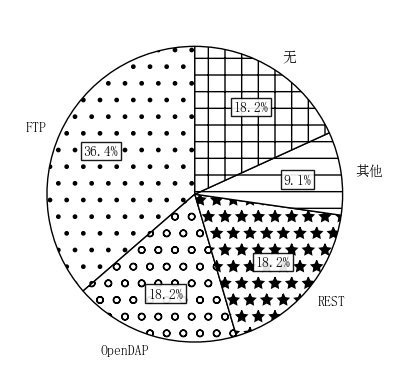

In [95]:
import matplotlib.pyplot as plt
import numpy as np

font_options = {
    "family": "serif",  # 设置字体家族
    "serif": "simsun",  # 设置字体
}
plt.rc("font", **font_options)

# 创建数据
apis = ["FTP", "OpenDAP", "REST", "其他", "无"]
sizes = [4, 2, 2, 1, 2]
hatches = [".", "o", "*", "-", "+"]

fig, ax = plt.subplots()

# 绘制饼图，但不直接添加百分比
wedges, texts = ax.pie(
    sizes,
    labels=apis,
    startangle=90,
    colors=["white"] * len(apis),
    wedgeprops=dict(edgecolor="black"),
)

# 应用纹理
for i, wedge in enumerate(wedges):
    wedge.set_hatch(hatches[i])

# 手动添加带有背景的百分比标签
total = sum(sizes)
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2.0 + wedge.theta1
    x = wedge.r * 0.7 * np.cos(np.deg2rad(angle))
    y = wedge.r * 0.7 * np.sin(np.deg2rad(angle))
    percentage = 100.0 * sizes[i] / total
    ax.text(
        x,
        y,
        "{:.1f}%".format(percentage),
        ha="center",
        va="center",
        bbox=dict(
            facecolor="white", alpha=0.9, edgecolor="black", boxstyle="square,pad=0.2"
        ),
    )

fig.savefig("api.pdf", bbox_inches="tight")
plt.show()

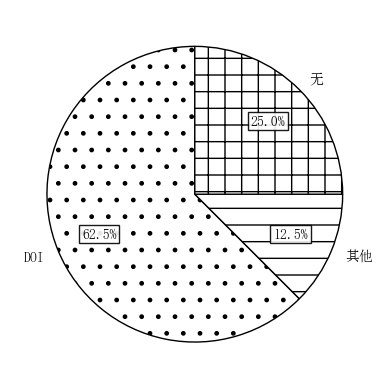

In [94]:
# 创建数据
dois = ["DOI", "其他", "无"]
sizes = [5, 1, 2]
hatches = [".", "-", "+"]

fig, ax = plt.subplots()

# 绘制饼图，但不直接添加百分比
wedges, texts = ax.pie(
    sizes,
    labels=dois,
    startangle=90,
    colors=["white"] * len(dois),
    wedgeprops=dict(edgecolor="black"),
)

# 应用纹理
for i, wedge in enumerate(wedges):
    wedge.set_hatch(hatches[i])

# 手动添加带有背景的百分比标签
total = sum(sizes)
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2.0 + wedge.theta1
    x = wedge.r * 0.7 * np.cos(np.deg2rad(angle))
    y = wedge.r * 0.7 * np.sin(np.deg2rad(angle))
    percentage = 100.0 * sizes[i] / total
    ax.text(
        x,
        y,
        "{:.1f}%".format(percentage),
        ha="center",
        va="center",
        bbox=dict(
            facecolor="white", alpha=0.9, edgecolor="black", boxstyle="square,pad=0.2"
        ),
    )

fig.savefig("doi.pdf", bbox_inches="tight")
plt.show()